# Assignment 3 - Mythili K 

# Dataset

Download the dataset [here](https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

## Data augmentation

In [2]:
# Data augmentaion on training variable

train_datagen = ImageDataGenerator(rescale = 1./255 , zoom_range = 0.2 , horizontal_flip = True )

In [3]:
# Data augmentation on testing varibale

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Data augmentation on training data

xtrain = train_datagen.flow_from_directory('dataset/train/' , 
                                           target_size = (64,64) , 
                                           class_mode = 'categorical' , 
                                           batch_size=100)

Found 3019 images belonging to 5 classes.


In [5]:
# Data augmentation on testing data

xtest = test_datagen.flow_from_directory('dataset/test/',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 438 images belonging to 5 classes.


## Model Building

In [6]:
# Initializing the sequential model
model = Sequential()

# Convolutional layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

# Maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Hidden layer 1
model.add(Dense(64,activation='relu'))

# Hidden layer 2
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(5,activation='softmax')) # output

## Compiling the model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [8]:
out=model.fit(xtrain,
              epochs=50,
              validation_data = xtest,
              validation_steps = len(xtest))

Epoch 1/50
31/31 [==============================] - 53s 2s/step - loss: 1.5340 - accuracy: 0.3379 - val_loss: 1.2663 - val_accuracy: 0.4224
Epoch 2/50
31/31 [==============================] - 32s 1s/step - loss: 1.2078 - accuracy: 0.4863 - val_loss: 1.2303 - val_accuracy: 0.4886
Epoch 3/50
31/31 [==============================] - 20s 648ms/step - loss: 1.1211 - accuracy: 0.5502 - val_loss: 1.1325 - val_accuracy: 0.5388
Epoch 4/50
31/31 [==============================] - 20s 627ms/step - loss: 1.0815 - accuracy: 0.5720 - val_loss: 1.0890 - val_accuracy: 0.5594
Epoch 5/50
31/31 [==============================] - 32s 1s/step - loss: 1.0545 - accuracy: 0.5866 - val_loss: 1.0999 - val_accuracy: 0.5639
Epoch 6/50
31/31 [==============================] - 31s 1s/step - loss: 1.0111 - accuracy: 0.6098 - val_loss: 1.0927 - val_accuracy: 0.5936
Epoch 7/50
31/31 [==============================] - 20s 645ms/step - loss: 0.9757 - accuracy: 0.6171 - val_loss: 1.0319 - val_accuracy: 0.5913
Epoch 8/50


## Plotting loss and accuracy

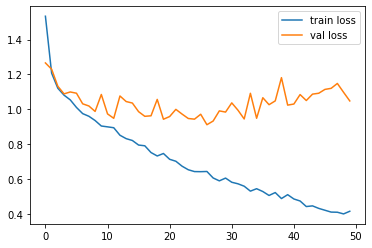

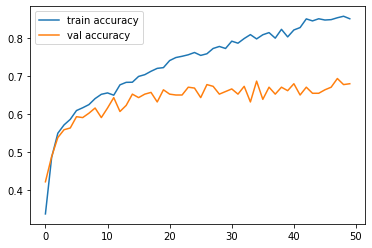

In [9]:
#plot the loss
plt.plot(out.history['loss'], label='train loss')
plt.plot(out.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(out.history['accuracy'], label='train accuracy')
plt.plot(out.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 64)                1968192   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                        

## Save the model

In [11]:
model.save('flower.h5')

## Testing the model

In [12]:
# Creating list
flow = ['daisy','dandelion','rose','sunflower','tulip']
def tester(img):
    img = image.load_img(img,target_size=(64,64))
    # Converting images into array
    x = image.img_to_array(img)
    # Expanding the dimensions
    x = np.expand_dims(x,axis=0)
    # Predicting the higher probability index
    pred = np.argmax(model.predict(x))
    return print("Predicted class : ",flow[pred])

# Showing image 
def show(img):
    img = image.load_img(img,target_size=(64,64))
    plt.imshow(img)


## Testing using flower images

Predicted class :  tulip


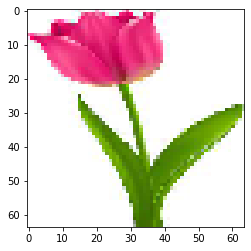

In [13]:
tester('flower1.jpg')
show('flower1.jpg')

Predicted class :  sunflower


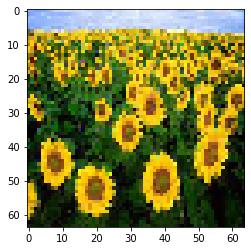

In [14]:
tester('flower2.jpg')
show('flower2.jpg')

Predicted class :  tulip


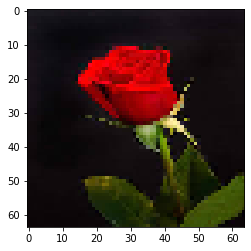

In [15]:
tester('flower4.jpg')
show('flower4.jpg')

Predicted class :  daisy


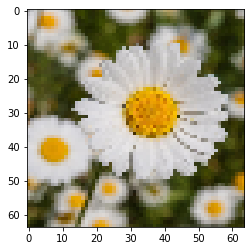

In [16]:
tester('flower5.jpg')
show('flower5.jpg')

## Inference

* The dataset comprises of five different classes of flowers with 4317 images
* The dataset is divided as 70% for training and 30% for testing and validation
* Model was built using Convolutional Neural network
* Accuracy : 85%
* Validation accuracy : 69%
* Testing accuracy : 90%




 